# COVID 19 Mexican Analysis
## Cesar Robles

### Introduction
Retrieving the information from the Mexican source system. All the information is public and anyone can download and interact with it.
The *database* is in the following link: http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip
The principal *descriptors* are in the following link: http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/diccionario_datos_covid19.zip

Both files are needed to understand the information collected by the Mexican Health Ministry. The information was splitted to avoid problems with the size volume. In this sense, this action help us to download the information.

**Needed libraries:**

The following lines can skip if you already have the packages.

In [1]:
!pip install --upgrade pip
!pip install pandas numpy zipfile37 xlrd openpyxl

Requirement already up-to-date: pip in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (20.2.4)


**Importing the libraries**

In [2]:
import pandas as pd
import zipfile
import glob
import os
import re

**Fucntion to check the files in the system**

This function verify the data in the folder

In [3]:
def checkFiles(fileName,files):
    flag = 0
    for file in files:
        if not re.search(fileName,file) == None:
            flag = 1
        else:
            flag = 0
    return flag, fileName

**If the Database doens't exist, then it download from the source**

This part of the code check the newest data by day. The mexican databases are updated daily. However, these databases are no accurate on weekends, being better to download and analyse the contet from monday to friday.

In [4]:
path = '../Databases'
files = glob.glob(os.path.join(path,'*'))

[flag,fileName] = checkFiles('datos_abiertos_covid19.zip',files)
if flag == 1:
    os.system('rm -r '+os.path.join(path,fileName))
    !wget -P '../Databases' http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip
else:
    !wget -P '../Databases' http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip

[flag,fileName] = checkFiles('diccionario_datos_covid19.zip',files)
if flag == 1:
    os.system('rm -r '+os.path.join(path,fileName))
    !wget -P '../Databases' http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/diccionario_datos_covid19.zip
else:
    !wget -P '../Databases' http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/diccionario_datos_covid19.zip

[flag,fileName] = checkFiles('datos_abiertos_covid19.csv',files)
if flag == 1:
    os.system('rm -r '+os.path.join(path,fileName))
[flag,fileName] = checkFiles('diccionario_datos_covid19',files)
if flag == 1:
    os.system('rm -r '+os.path.join(path,fileName))

--2020-10-31 18:59:42--  http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip
Resolving datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)... 187.210.186.146
Connecting to datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)|187.210.186.146|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50985917 (49M) [application/x-zip-compressed]
Saving to: ‘../Databases/datos_abiertos_covid19.zip’

datos_abiertos_covi 100%[===================>]  48.62M  8.90MB/s    in 5.6s    

2020-10-31 18:59:48 (8.62 MB/s) - ‘../Databases/datos_abiertos_covid19.zip’ saved [50985917/50985917]

--2020-10-31 18:59:48--  http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/diccionario_datos_covid19.zip
Resolving datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)... 187.210.186.146
Connecting to datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)|187.210.186.146|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length:

**Extracting the information**

This part of the code check all the compress files in zip format, and uncompress to check the data. This part includes the catalogues as well as the latest databases.

In [5]:
import zipfile
files = glob.glob(os.path.join(path,'*.zip'))
for file in files:
    if file == "../Databases/diccionario_datos_covid19.zip":
        with zipfile.ZipFile(file,"r") as zip_ref:
            zip_ref.extractall("../Databases/diccionario_datos_covid19/.")
    else:
        with zipfile.ZipFile(file,"r") as zip_ref:
            zip_ref.extractall("../Databases/.")

In [6]:
glob.glob(os.path.join(path,'*'))

['../Databases/datos_abiertos_covid19.zip',
 '../Databases/201030COVID19MEXICO.csv',
 '../Databases/diccionario_datos_covid19',
 '../Databases/diccionario_datos_covid19.zip']

**This part reads the database in csv format to dataframes**

In [7]:
files = glob.glob(os.path.join(path,'*.csv'))
db = pd.read_csv(files[0],engine='python')
db.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-10-30,13adfc,1,4,30,1,15,30,131,2,...,2,2,99,1,1,3,99,México,97,2
1,2020-10-30,099892,1,4,8,2,8,8,37,2,...,2,2,99,1,1,3,99,México,97,2
2,2020-10-30,174e8d,1,12,9,2,9,9,13,1,...,2,2,2,1,1,3,99,México,97,97
3,2020-10-30,196fa6,1,12,9,2,9,9,12,1,...,2,2,1,1,1,3,99,México,97,97
4,2020-10-30,070708,2,12,9,2,9,9,16,1,...,2,2,1,1,1,3,99,México,97,97


## Transforming the data

The database are very large and it increases daily. However, the confirm cases are used for this analysis. In this database, the confirm cases also have other relations such as smoking, pneumonia, COPD, asthma, hyperthension, diabetes, among other complications.

In this case, we are going to extract only the confirma cases by means of a laboratory analysis.

In [8]:
# Get positive COVID 19 infected people
data = db.loc[(db['RESULTADO_LAB']==1)]
print(len(data))
data.head()

891550


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-10-30,13adfc,1,4,30,1,15,30,131,2,...,2,2,99,1,1,3,99,México,97,2
1,2020-10-30,099892,1,4,8,2,8,8,37,2,...,2,2,99,1,1,3,99,México,97,2
2,2020-10-30,174e8d,1,12,9,2,9,9,13,1,...,2,2,2,1,1,3,99,México,97,97
3,2020-10-30,196fa6,1,12,9,2,9,9,12,1,...,2,2,1,1,1,3,99,México,97,97
4,2020-10-30,070708,2,12,9,2,9,9,16,1,...,2,2,1,1,1,3,99,México,97,97


**Let us extract the catalogue information to integrate it in the database, this will help to easy understand the parameters**

In [9]:
print(path)
os.system('rm -r '+os.path.join(path,'*.zip'))
files = glob.glob(os.path.join(path,'*/*'))
for file in files:
    if re.search('Catalogos',file) != None:
        print(file)
        break
catalogues = pd.ExcelFile(file)
catalogues.sheet_names

../Databases
../Databases/diccionario_datos_covid19/Catalogos_071020.xlsx


['Catálogo ORIGEN',
 'Catálogo SECTOR',
 'Catálogo SEXO',
 'Catálogo TIPO_PACIENTE',
 'Catálogo SI_NO',
 'Catálogo NACIONALIDAD',
 'Catálogo RESULTADO_LAB',
 'Catálogo CLASIFICACION_FINAL',
 'Catálogo de ENTIDADES',
 'Catálogo MUNICIPIOS']

**In this part, the catalogue is open and merge to the database**

**ORIGIN Catalogue**

It describes the origin description.

|Code|Descriptio|
|----|----------|
| 1  | USMER    |
| 2  | Out of USMER |
| 99 | Not specify |

Sentinel surveillance is carried out through the system of respiratory disease monitoring units (USMER). The USMER includes medical units of the first, second or third level of care, and third level units also participate as USMERs, which due to their characteristics contribute to expanding the epidemiological information panorama, including those with a specialty in pulmonology, infectology or pediatrics.


In [10]:
origen = catalogues.parse('Catálogo ORIGEN')
data = pd.merge(data,origen,left_on='ORIGEN',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'ORIGEN_DESC'})
data = data.drop('CLAVE',axis=1)
len(data)

891550

**SECTOR CATALOGUE**

Identify the type of institution of the National Health System that provided the care.

| Code | Description |
|------|-------------|
| 1	| CRUZ ROJA|
|2	| DIF |
|3	| ESTATAL |
|4	| IMSS |
|5	| IMSS-BIENESTAR |
|6	| ISSSTE |
|7	| MUNICIPAL|
|8	| PEMEX|
|9	| PRIVADA|
|10	| SEDENA|
|11	| SEMAR|
|12	| SSA|
|13	| UNIVERSITARIO|
|99	| NO ESPECIFICADO |

In [11]:
sector = catalogues.parse('Catálogo SECTOR')
data = pd.merge(data,sector,left_on='SECTOR',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'SECTOR_DESC'})
data = data.drop('CLAVE',axis=1)
len(data)

891550

**GENDER**

| CODE |	DESCRIPTION|
|-|-|
|1|	MUJER|
|2|	HOMBRE|
|99|	NO ESPECIFICADO|

In [12]:
sexo = catalogues.parse('Catálogo SEXO')
data = pd.merge(data,sexo,left_on='SEXO',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'SEXO_DESC'})
data = data.drop('CLAVE',axis=1)
len(data)

891550

**Type of Patient**

Classify a patient by its status, if it is set to a hospital or it is not necesary to stay there.

|CODE	| DESCRIPTION|
|-|-|
|1|	AMBULATORIO|
|2|	HOSPITALIZADO|
|99|	NO ESPECIFICADO|

In [13]:
tipoPaciente = catalogues.parse('Catálogo TIPO_PACIENTE')
data = pd.merge(data,tipoPaciente,left_on='TIPO_PACIENTE',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'TIPO_PACIENTE_DESC'})
data = data.drop('CLAVE',axis=1)
len(data)

891550

**Nationality**

Classify the patient by its nationality

|CODE|	DESCRIPTION|
|-|-|
|1	|MEXICANA|
|2	|EXTRANJERA|
|99	|NO ESPECIFICADO|

In [14]:
nacionalidad = catalogues.parse('Catálogo NACIONALIDAD')
data = pd.merge(data,nacionalidad,left_on='NACIONALIDAD',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'NACIONALIDAD_DESC'})
data = data.drop('CLAVE',axis=1)
len(data)

891550

**Medical Analysis**

This is the most important classification, because it identifies the personn as infected or healthy.

|CODE|	DESCRIPTION|
|-|-|
|1|	POSITIVO A SARS-COV-2|
|2|	NO POSITIVO A SARS-COV-2|
|3|	RESULTADO PENDIENTE|
|4|	RESULTADO NO ADECUADO |
|97|	NO APLICA (CASO SIN MUESTRA)|

In [15]:
resultadoLab = catalogues.parse('Catálogo RESULTADO_LAB',1)
data = pd.merge(data,resultadoLab,left_on='RESULTADO_LAB',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'RESULTADO_LAB_DESC'})
data = data.drop('CLAVE',axis=1)
len(data)

891550

**Final Classification**

It checks and compare the status with the medical appointment.

|CODE|	CLASIFICATION|	DESCRIPTION|
|-|-|-|
|1|	CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA|	"Confirmado por asociación aplica cuando el caso informó ser contacto de un positivo a COVID-19 (y este se encuentra registrado en el SISVER) y: Al caso no se le tomo muestra o la muestra resultó no válida. "|
|2|	CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN|	"Confirmado por dictaminación solo aplica para defunciones bajo las siguientes condiciones: Al caso no se le tomo muestra o sí se tomó muestra, pero la muestra resultó no válida. "|
|3|	CASO DE SARS-COV-2  CONFIRMADO POR LABORATORIO|	"Confirmado por laboratorio aplica cuando: El caso tiene muestra y resultó positiva  a SARS-CoV-2, sin importar si el caso tienen asociación clínica epidemiológica."|
|4	|INVÁLIDO POR LABORATORIO|	Inválido aplica cuando el caso no tienen asociación clínico epidemiológica, ni dictaminación a COVID-19. Se le tomó muestra y esta resultó no válida. |
|5	|NO REALIZADO POR LABORATORIO	|No realizado aplica cuando el caso no tienen asociación clínico epidemiológica, ni dictaminación a COVID-19 y se le tomó muestra y esta no se procesó.|
|6	|CASO SOSPECHOSO|	"Sospechoso aplica cuando: El caso no tienen asociación clínico epidemiológica, ni dictaminación a COVID-19 y no se le tomó muestra, o se le tomó muestra y está pendiente de resultado, sin importar otra condición."|
|7	|NEGATIVO A SARS-COV-2 POR LABORATORIO|	"Negativo aplica cuando el caso:Se le tomo muestra y esta resultó: negativa a SARS-COV-2 o positiva a cualquier otro virus respiratorio (Influenza, VSR, Bocavirus, otros) sin importar que este caso tenga asociación clínico epidemiológica o dictaminación a COVID-19."|

In [16]:
classificacion_final = catalogues.parse('Catálogo CLASIFICACION_FINAL',2)
data = pd.merge(data,classificacion_final,left_on='CLASIFICACION_FINAL',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'CLAS_DESC'})
data = data.drop('CLAVE',axis=1)
len(data)

891550

**Entities Catalogue**

All the states that present someone infected.

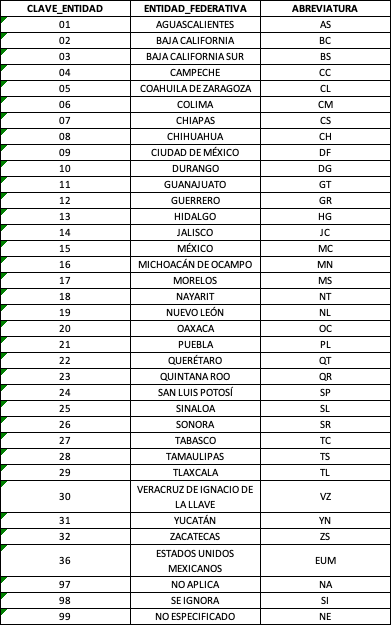

In [17]:
entidades = catalogues.parse('Catálogo de ENTIDADES')
data = pd.merge(data,entidades,left_on='ENTIDAD_NAC',right_on='CLAVE_ENTIDAD')
data = data.rename(columns={'ENTIDAD_FEDERATIVA':'ENTIDAD_FEDERATIVA_NAC','ABREVIATURA':'ABREVIATURA_NAC'})
data = data.drop('CLAVE_ENTIDAD',axis=1)
len(data)

891550

In [18]:
entidades = catalogues.parse('Catálogo de ENTIDADES')
data = pd.merge(data,entidades,left_on='ENTIDAD_RES',right_on='CLAVE_ENTIDAD')
data = data.rename(columns={'ENTIDAD_FEDERATIVA':'ENTIDAD_FEDERATIVA_RES','ABREVIATURA':'ABREVIATURA_RES'})
data = data.drop('CLAVE_ENTIDAD',axis=1)
len(data)

891550

In [19]:
entidades = catalogues.parse('Catálogo de ENTIDADES')
data = pd.merge(data,entidades,left_on='ENTIDAD_UM',right_on='CLAVE_ENTIDAD')
data = data.rename(columns={'ENTIDAD_FEDERATIVA':'ENTIDAD_FEDERATIVA_UM','ABREVIATURA':'ABREVIATURA_UM'})
data = data.drop('CLAVE_ENTIDAD',axis=1)
len(data)

891550

**Yes or no catalogue**

Depending on the column it shows a result.

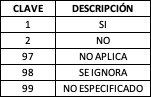

In [20]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='INTUBADO',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'INTUBADO_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [21]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='NEUMONIA',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'NEUMONIA_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [22]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='HABLA_LENGUA_INDIG',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'HABLA_LENGUA_INDIG_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [23]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='INDIGENA',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'INDIGENA_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [24]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='DIABETES',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'DIABETES_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [25]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='EPOC',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'EPOC_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [26]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='ASMA',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'ASMA_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [27]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='INMUSUPR',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'INMUSUPR_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [28]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='OTRA_COM',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'OTRA_COM_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [29]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='CARDIOVASCULAR',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'CARDIOVASCULAR_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [30]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='OBESIDAD',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'OBESIDAD_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [31]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='RENAL_CRONICA',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'RENAL_CRONICA_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [32]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='TABAQUISMO',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'TABAQUISMO_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [33]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='OTRO_CASO',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'OTRO_CASO_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [34]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='TOMA_MUESTRA',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'TOMA_MUESTRA_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [35]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='MIGRANTE',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'MIGRANTE_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [36]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='UCI',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'UCI_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [37]:
si_no = catalogues.parse('Catálogo SI_NO')
data = pd.merge(data,si_no,left_on='HIPERTENSION',right_on='CLAVE')
data = data.rename(columns={'DESCRIPCIÓN':'HIPERTENSION_DESC'})
data = data.drop(['CLAVE'],axis=1)
len(data)

891550

In [38]:
municipios = catalogues.parse('Catálogo MUNICIPIOS')
data = pd.merge(data,municipios,left_on=['MUNICIPIO_RES','ENTIDAD_RES'],right_on=['CLAVE_MUNICIPIO','CLAVE_ENTIDAD'])
data = data.drop(['CLAVE_ENTIDAD','CLAVE_MUNICIPIO'],axis=1)
data = data.rename(columns={'MUNICIPIO':'MUNICIPIO_RES_DESC'})
len(data)

891545

**Display the table with all the description for the columns**

In [39]:
data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR_DESC,OBESIDAD_DESC,RENAL_CRONICA_DESC,TABAQUISMO_DESC,OTRO_CASO_DESC,TOMA_MUESTRA_DESC,MIGRANTE_DESC,UCI_DESC,HIPERTENSION_DESC,MUNICIPIO_RES_DESC
0,2020-10-30,13adfc,1,4,30,1,15,30,131,2,...,NO,NO,NO,NO,NO ESPECIFICADO,SI,NO ESPECIFICADO,NO,SI,POZA RICA DE HIDALGO
1,2020-10-30,13af30,1,4,30,1,30,30,131,2,...,NO,NO,NO,NO,NO ESPECIFICADO,SI,NO ESPECIFICADO,NO,SI,POZA RICA DE HIDALGO
2,2020-10-30,0b8c21,1,4,30,2,30,30,131,2,...,NO,NO,NO,NO,NO ESPECIFICADO,SI,NO ESPECIFICADO,NO,SI,POZA RICA DE HIDALGO
3,2020-10-30,09313b,2,4,30,1,30,30,131,2,...,NO,NO,NO,NO,NO ESPECIFICADO,SI,NO ESPECIFICADO,NO,SI,POZA RICA DE HIDALGO
4,2020-10-30,0d9b51,1,4,30,1,30,30,131,2,...,NO,NO,NO,NO,NO ESPECIFICADO,SI,NO ESPECIFICADO,NO,SI,POZA RICA DE HIDALGO


**Change the date 9999-99-99 to Alive**

In [40]:
import datetime

data['FECHA_INGRESO'] = pd.to_datetime(data['FECHA_INGRESO'])
data.loc[(data['FECHA_DEF'].isin(['9999-99-99'])),'Status'] = 'Alive'
data.loc[(~data['FECHA_DEF'].isin(['9999-99-99'])),'Status'] = 'Dead'

today = datetime.datetime.now()
delta_time = datetime.timedelta(days = 15)
newDate = today - delta_time
data.loc[(data['FECHA_DEF'].isin(['9999-99-99'])) & (data['FECHA_INGRESO']>pd.to_datetime(newDate.date())) & (data['TIPO_PACIENTE_DESC'].isin(['AMBULATORIO'])),'Status']='Active'

today = datetime.datetime.now()
delta_time = datetime.timedelta(days = 25)
newDate = today - delta_time
data.loc[(data['FECHA_DEF'].isin(['9999-99-99'])) & (data['FECHA_INGRESO']>pd.to_datetime(newDate.date())) & (data['TIPO_PACIENTE_DESC'].isin(['HOSPITALIZADO'])),'Status']='Active'

**Change the column to datetime format**

In [41]:
data['FECHA_INGRESO'] = pd.to_datetime(data['FECHA_INGRESO'])
data['FECHA_SINTOMAS'] = pd.to_datetime(data['FECHA_SINTOMAS'])

**Extract the month from the datetime analysis**

In [42]:
data['MES_ING'] = data['FECHA_INGRESO'].dt.month
data['MES_SINTOMAS'] = data['FECHA_SINTOMAS'].dt.month
data['MES_DEF'] = data['FECHA_DEF'].str.split('-',expand=True)[1].astype(int)

**Saving the result into a csv file**

In [43]:
data.loc[(data['EDAD']<5),'EDAD_CLASS'] = 'Baby'
data.loc[(data['EDAD'].between(5,8)),'EDAD_CLASS'] = 'Child'
data.loc[(data['EDAD'].between(9,17)),'EDAD_CLASS'] = 'Teenage'
data.loc[(data['EDAD'].between(18,30)),'EDAD_CLASS'] = 'Young Adult'
data.loc[(data['EDAD'].between(31,60)),'EDAD_CLASS'] = 'Adult'
data.loc[(data['EDAD']>60),'EDAD_CLASS'] = 'Senior Adult'

In [44]:
path = '../Files'
os.system('rm -r ../Databases/*')
data.to_csv(os.path.join(path,'mex_covid_daily.csv'),index=False,encoding='utf-8')
#data.to_excel(os.path.join(path,'mex_covid_daily.xlsx'),'DB',index=False)

In [45]:
os.system('zip ../Files/db.zip ../Files/mex_covid_daily.csv')
os.system('rm -r ../Files/*.csv')

0

**End of File**

In [46]:
len(data)

891545

In [47]:
data.groupby(['Status'],as_index=False)['ID_REGISTRO'].count()

,Status,ID_REGISTRO
0,Active,51313
1,Alive,751820
2,Dead,88412


In [48]:
alive = data.loc[(data['Status'].isin(['Alive'])),'ID_REGISTRO'].count()
dead = data.loc[(data['Status'].isin(['Dead'])),'ID_REGISTRO'].count()
active = data.loc[(data['Status'].isin(['Active'])),'ID_REGISTRO'].count()
print('Total confirmed people: {0:,.0f}'.format(alive+dead+active))

Total confirmed people: 891,545


In [49]:
data.groupby(['MES_DEF','Status'],as_index=False)['ID_REGISTRO'].count()

,MES_DEF,Status,ID_REGISTRO
0,3,Dead,80
1,4,Dead,3550
2,5,Dead,12490
3,6,Dead,17604
4,7,Dead,20099
5,8,Dead,15860
6,9,Dead,10527
7,10,Dead,8202
8,99,Active,51313
9,99,Alive,751820


In [50]:
data.columns.tolist()

['FECHA_ACTUALIZACION',
 'ID_REGISTRO',
 'ORIGEN',
 'SECTOR',
 'ENTIDAD_UM',
 'SEXO',
 'ENTIDAD_NAC',
 'ENTIDAD_RES',
 'MUNICIPIO_RES',
 'TIPO_PACIENTE',
 'FECHA_INGRESO',
 'FECHA_SINTOMAS',
 'FECHA_DEF',
 'INTUBADO',
 'NEUMONIA',
 'EDAD',
 'NACIONALIDAD',
 'EMBARAZO',
 'HABLA_LENGUA_INDIG',
 'INDIGENA',
 'DIABETES',
 'EPOC',
 'ASMA',
 'INMUSUPR',
 'HIPERTENSION',
 'OTRA_COM',
 'CARDIOVASCULAR',
 'OBESIDAD',
 'RENAL_CRONICA',
 'TABAQUISMO',
 'OTRO_CASO',
 'TOMA_MUESTRA',
 'RESULTADO_LAB',
 'CLASIFICACION_FINAL',
 'MIGRANTE',
 'PAIS_NACIONALIDAD',
 'PAIS_ORIGEN',
 'UCI',
 'ORIGEN_DESC',
 'SECTOR_DESC',
 'SEXO_DESC',
 'TIPO_PACIENTE_DESC',
 'NACIONALIDAD_DESC',
 'RESULTADO_LAB_DESC',
 'CLASIFICACIÓN',
 'CLAS_DESC',
 'ENTIDAD_FEDERATIVA_NAC',
 'ABREVIATURA_NAC',
 'ENTIDAD_FEDERATIVA_RES',
 'ABREVIATURA_RES',
 'ENTIDAD_FEDERATIVA_UM',
 'ABREVIATURA_UM',
 'INTUBADO_DESC',
 'NEUMONIA_DESC',
 'HABLA_LENGUA_INDIG_DESC',
 'INDIGENA_DESC',
 'DIABETES_DESC',
 'EPOC_DESC',
 'ASMA_DESC',
 'INMUSUPR

In [51]:
data['EDAD'].unique()

array([ 65,  74,  54,  58,  71,  49,  80,  68,  63,  85,  37,  93,  78,
        64,  79,  53,  81,  70,  73,  76,  48,  47,  59,  83,  50,  40,
        66,  69,  51,  75,  38,  55,  67,  57,  35,  61,  82,  72,  46,
        36,  88,  42,  62,  84,  77,  52,  45,  96,  41,  56,  92,  44,
        60,  39,  87,  29,  43,  34,  27,  28,  32,  86,  30,  23,  24,
        25,  31,  12,  20,  33,  89,  18,  19,  26,  22,  13,  10,  21,
        11,  15,  16,   4,   9,   3,  95,  90, 100,  91,   0,  94,   2,
        17,   5,   1, 108,  14,   7,   8,  98, 101, 103, 102,   6,  97,
       104,  99, 109, 107, 105, 114, 116, 106, 118, 110, 112, 115, 120])

In [52]:
data.groupby(['EDAD'],as_index=False)['ID_REGISTRO'].count()

,EDAD,ID_REGISTRO
0,0,1756
1,1,1154
2,2,804
3,3,737
4,4,757
...,...,...
112,114,2
113,115,1
114,116,2
115,118,2


In [53]:
data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA', 'RESULTADO_LAB', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI', 'ORIGEN_DESC',
       'SECTOR_DESC', 'SEXO_DESC', 'TIPO_PACIENTE_DESC', 'NACIONALIDAD_DESC',
       'RESULTADO_LAB_DESC', 'CLASIFICACIÓN', 'CLAS_DESC',
       'ENTIDAD_FEDERATIVA_NAC', 'ABREVIATURA_NAC', 'ENTIDAD_FEDERATIVA_RES',
       'ABREVIATURA_RES', 'ENTIDAD_FEDERATIVA_UM', 'ABREVIATURA_UM',
       'INTUBADO_DESC', 'NEUMONIA_DESC', 'HABLA_LENGUA_INDIG_DESC',
       'INDIGENA_DESC', 'DIABETES_DESC

In [54]:
data.groupby('EDAD_CLASS')['ID_REGISTRO'].count()

EDAD_CLASS
Adult           534471
Baby              5208
Child             3623
Senior Adult    156894
Teenage          18095
Young Adult     173254
Name: ID_REGISTRO, dtype: int64

In [55]:
data.dtypes

FECHA_ACTUALIZACION    object
ID_REGISTRO            object
ORIGEN                  int64
SECTOR                  int64
ENTIDAD_UM              int64
                        ...  
Status                 object
MES_ING                 int64
MES_SINTOMAS            int64
MES_DEF                 int64
EDAD_CLASS             object
Length: 76, dtype: object

In [56]:
data['Status'].count()

891545

In [57]:
db['ID_REGISTRO'].count()

2386284

In [58]:
db.groupby(['RESULTADO_LAB'],as_index=False)['ID_REGISTRO'].count()

,RESULTADO_LAB,ID_REGISTRO
0,1,891550
1,2,1110937
2,3,72715
3,4,104346
4,97,206736
